In [46]:
import numpy as np
import seaborn as sns
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import matplotlib.font_manager 
from sklearn.model_selection import train_test_split

### Задание

В домашнем задании нужно решить задачу классификации типа стекол. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

#### Этапы работы:

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2. Проведите первичный анализ.
- а) Проверьте количество записей для каждого класса. Сделайте вывод.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).
6. Обработайте выбросы в данных.
- а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
- b) Исследуйте признаки на выбросы несколькими способами.
- c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.
7. Повторите п. 4, п. 5.
8. Сформулируйте выводы по проделанной работе.
- а) Кратко опишите, какие преобразования были сделаны с данными.
- b) Сравните точность двух моделей.
- c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.


Для получения зачета по этому домашнему заданию минимально должны быть реализованы методы по поиску выбросов и построены две модели: «до» и «после» обработки экстремальных значений.

In [27]:
data = pd.read_csv('glass.csv')

In [28]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### 2. Проведите первичный анализ.
- а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [29]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [30]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

По количеству значений классы не сбалансированы: диапазон колебаний значений по классам от 76 до 9, то есть 6-го класса более чем в 8 раз меньше, чем 2-го класса, к примеру.
Более наглядно все отображено на графике

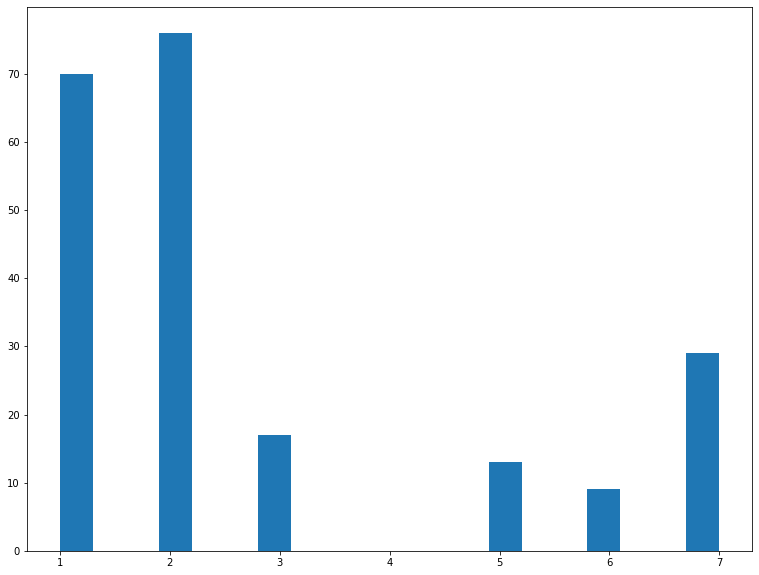

In [47]:
plt.hist(x = data['Type'], bins = 20);

In [48]:
X = data.drop('Type', axis=1)

In [49]:
Y = data.Type

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [159]:
# clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=10)
rfc = RandomForestClassifier(max_depth=2, random_state=0)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#### 4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

In [160]:
# clf.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

#### 5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [161]:
clf.score(X_test, y_test)

0.6976744186046512

In [162]:
rfc.score(X_test, y_test)

0.6511627906976745

#### 6. Обработайте выбросы в данных.
- а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
- b) Исследуйте признаки на выбросы несколькими способами.
- c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,10

<AxesSubplot:xlabel='variable', ylabel='value'>

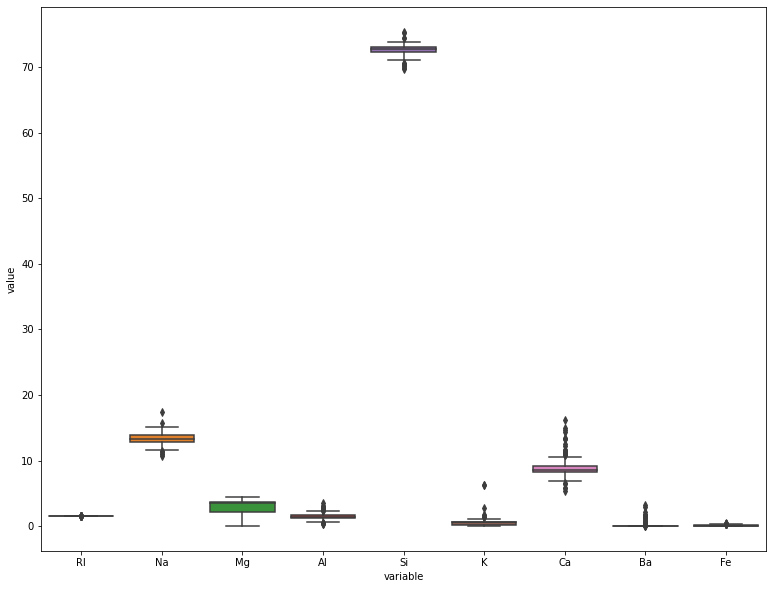

In [72]:
sns.boxplot(x="variable", y="value", data=pd.melt(X))

In [109]:
# features = X.columns[:-1].tolist()
# rcParams['figure.figsize'] = 10,9
# for feat in features:
#     skew = X[feat].skew()
#     sns.distplot(X[feat], kde= False, label='Сдвиг = %.3f' %(skew), bins=30, rug=True);
#     plt.legend(loc='best');
#     plt.show();



А теперь попробуем посмотреть на выбросы по каждому из элементов, но в разрезе типов стекол:

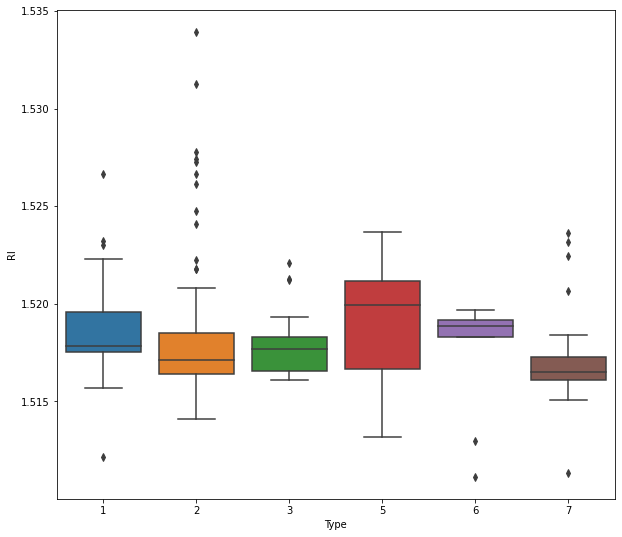

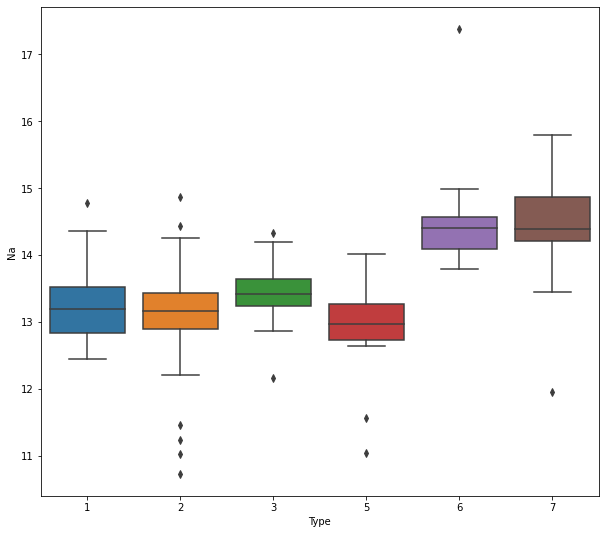

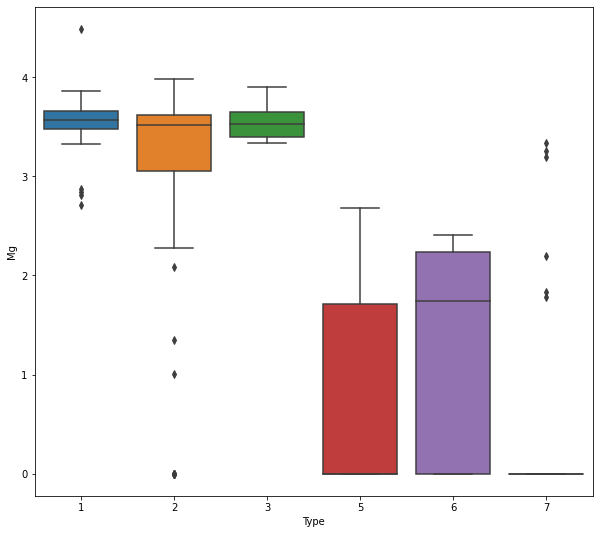

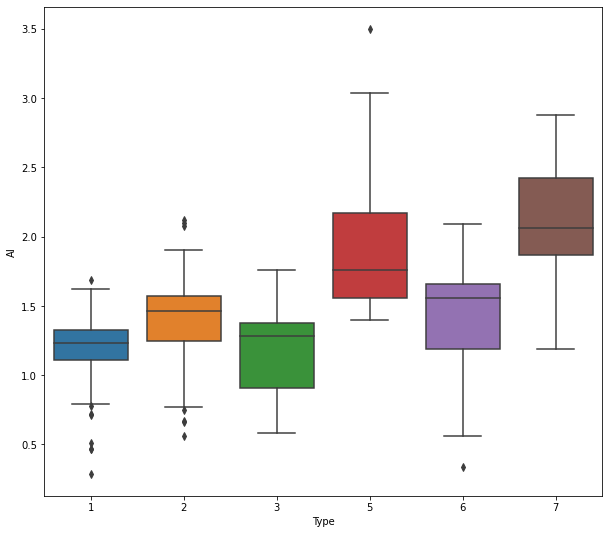

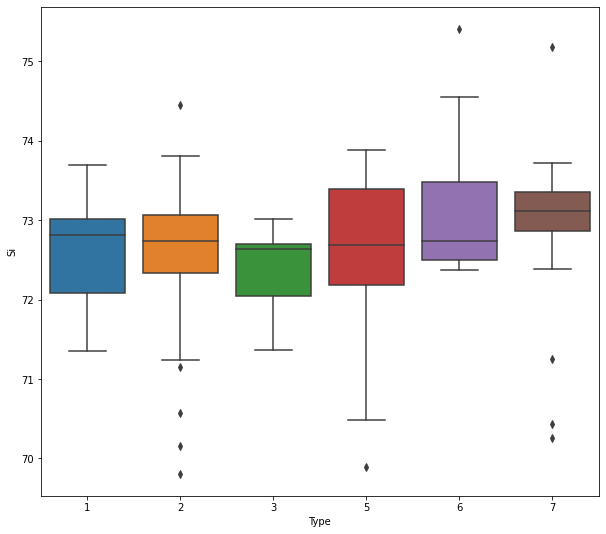

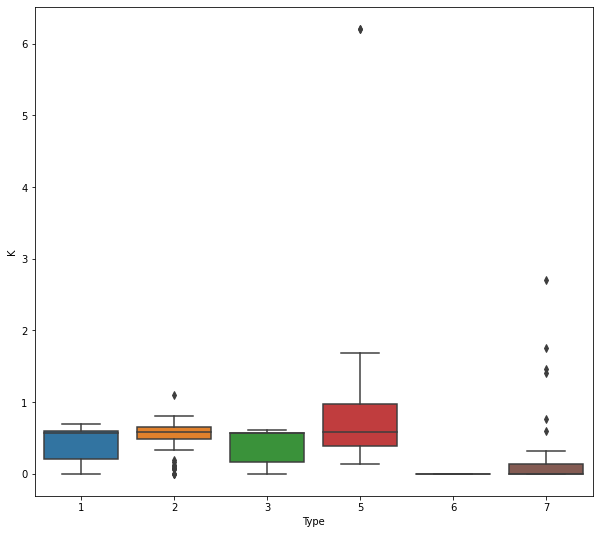

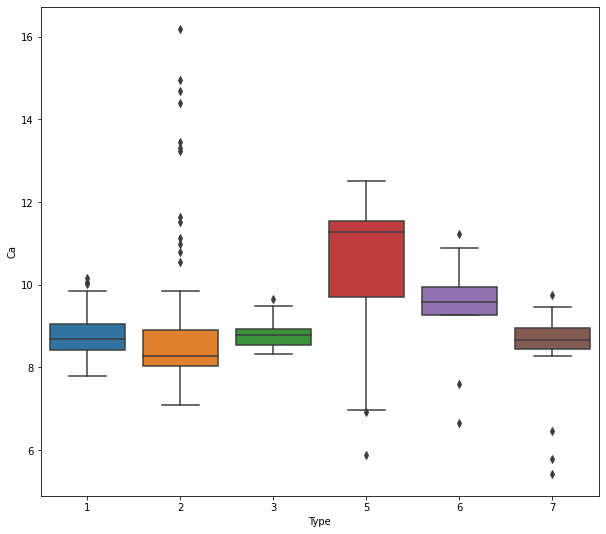

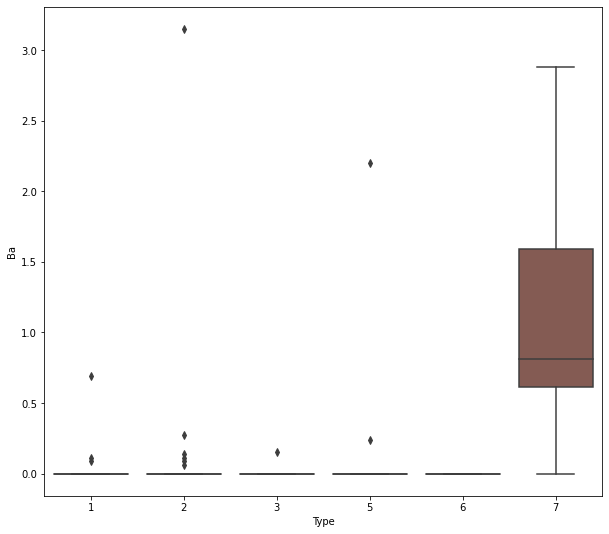

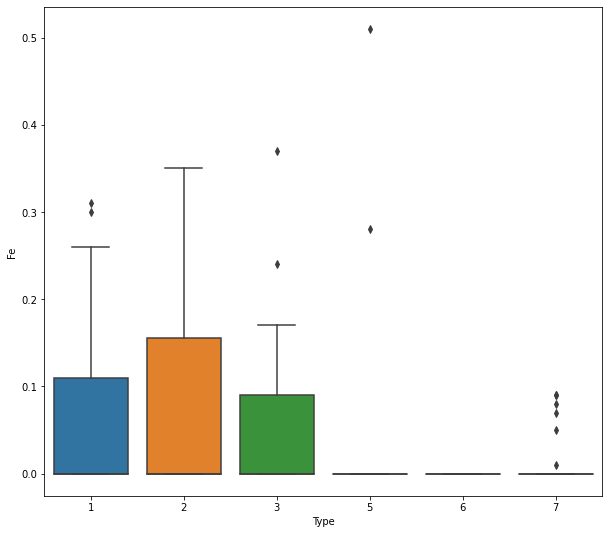

In [112]:
feature_names = data.columns
for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='Type', y=feature_names[i], data=data)

Выбросы видны.
Для того, чтобы от них избавиться правильно, нужно преддварительно переработать сам дата-сет

In [114]:
#Создаем словарь из дата фрейма

types = data['Type'].unique()
d = {type: data[data['Type'] == type] for type in types}


Выбросами будем считать все, что не попадает в 1,5 межквантильного размаха

In [115]:
# считаем межквантильный размах и создаем словарь с этими данными по каждому типу стекла
low = .25
high = .75

limits = {}
for type in types:
    filt_df = d[type].loc[:, d[type].columns != 'Type'] # Remove 'Type' Column
    quant_df = filt_df.quantile([low, high])
    IQR = quant_df.iloc[1,:]-  quant_df.iloc[0,:]
    quant_df.iloc[0,:] = quant_df.iloc[0,:] - 1.5*IQR
    quant_df.iloc[1,:] = quant_df.iloc[1,:] + 1.5*IQR
    limits[type] = quant_df

In [116]:
limits[5]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0.25,1.509865,11.92,-2.565,0.645,70.365,-0.505,6.955,0.0,0.0
0.75,1.527985,14.08,4.275,3.085,75.205,1.855,14.275,0.0,0.0


In [119]:
# убираем выбросы

for type in types:
    filt_df = d[type].loc[:, d[type].columns != 'Type'] # убираем колонку с типом стекла
    # далее добавляем в датафрейм только те значения, что меньше положитеьных выбросов и больше отрицательных выбросов
    filt_df = filt_df.apply(lambda x: x[(x>limits[type].loc[low,x.name]) & (x < limits[type].loc[high,x.name])], axis=0)
    df_new[type] = pd.concat([filt_df,d[type].loc[:,'Type']], axis=1)


glassdata = result = pd.concat(df_new)
glassdata.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

<AxesSubplot:xlabel='variable', ylabel='value'>

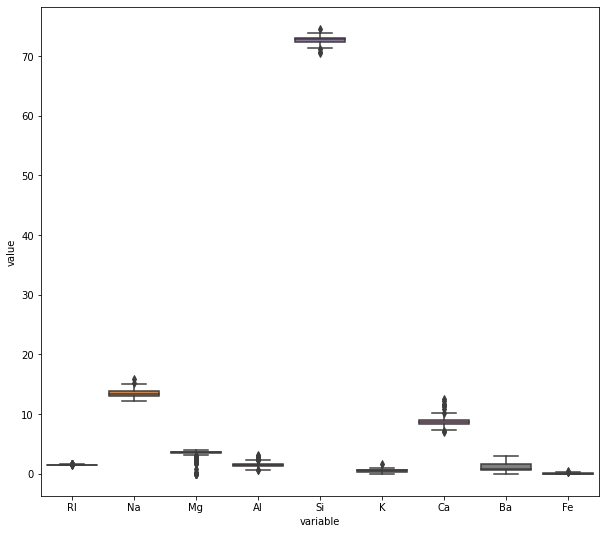

In [163]:
sns.boxplot(x="variable", y="value", data=pd.melt(glassdata.drop('Type', axis=1))) 

Посчитаем % уменьшения данных

In [153]:
features = X.columns.tolist()
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [156]:
for col in features:
    print('Сокращение колонки', col+':', round(100 - ((len(glassdata[col])-glassdata[col].isnull().sum())/len(glassdata[col])*100), 2), '%')

Сокращение колонки RI: 12.15 %
Сокращение колонки Na: 6.07 %
Сокращение колонки Mg: 21.5 %
Сокращение колонки Al: 7.94 %
Сокращение колонки Si: 5.14 %
Сокращение колонки K: 13.55 %
Сокращение колонки Ca: 12.15 %
Сокращение колонки Ba: 86.45 %
Сокращение колонки Fe: 25.7 %


Итак, самое сильное (критически сильное) уменьшение данных случилось в колонке по баррию. Вполне возможно, что имеет смысл именно эту колонку оставить неизменой

In [186]:
glassdata.Ba = data.Ba 

#### 7. Повторите п. 4, п. 5.

Также для нормальной работы random forest необходимо избавиться от Nan в колонках. Заменим их на медианные значения.

In [180]:
for col in features:
    glassdata[col] = glassdata[col].fillna(data[col].median())


In [181]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(glassdata.drop('Type', axis=1), Y, test_size=0.2, random_state=2)

In [204]:
rfc_n = RandomForestClassifier(max_depth=4, random_state=0)
clf_n = DecisionTreeClassifier(max_depth=4, random_state=5)

In [205]:
rfc_n.fit(Xx_train, yy_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [206]:
clf_n.fit(Xx_train, yy_train) 

DecisionTreeClassifier(max_depth=4, random_state=5)

In [207]:
rfc_n.score(Xx_test, yy_test)

0.6511627906976745

In [208]:
clf_n.score(Xx_test, yy_test)

0.6511627906976745

#### Вывод:
- стало только хуже: если до этого хватало глубины модели в 2, то сейчас для 65% необходимо уже иметь глубину 4;
- скорее всего, я что-то не то сделал и, возможно, надо было не удалять значения в колонках, а удалять сразу строки. Но в этом случае, DF бы сильно сократился, что не привело бы к сохранению релевантности модели.
- в целом, еще и не факт, что те значения, которые изначально были определены как выбросы, вообще этими самыми выбросами являются